In [47]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.lines as mlines

In [48]:
df = pd.read_parquet("basic_uber_df_cleaned_100624.parquet")
df.head()

,taxi_zone,datetime,passenger_count,year_month,day,week,hour,company
0,4,2022-01-01 00:00:00,178.0,2022-01,1,Saturday,0,Uber
1,4,2022-01-01 00:00:00,89.0,2022-01,1,Saturday,0,Lyft
2,4,2022-01-01 01:00:00,294.0,2022-01,1,Saturday,1,Uber
3,4,2022-01-01 01:00:00,80.0,2022-01,1,Saturday,1,Lyft
4,4,2022-01-01 02:00:00,292.0,2022-01,1,Saturday,2,Uber


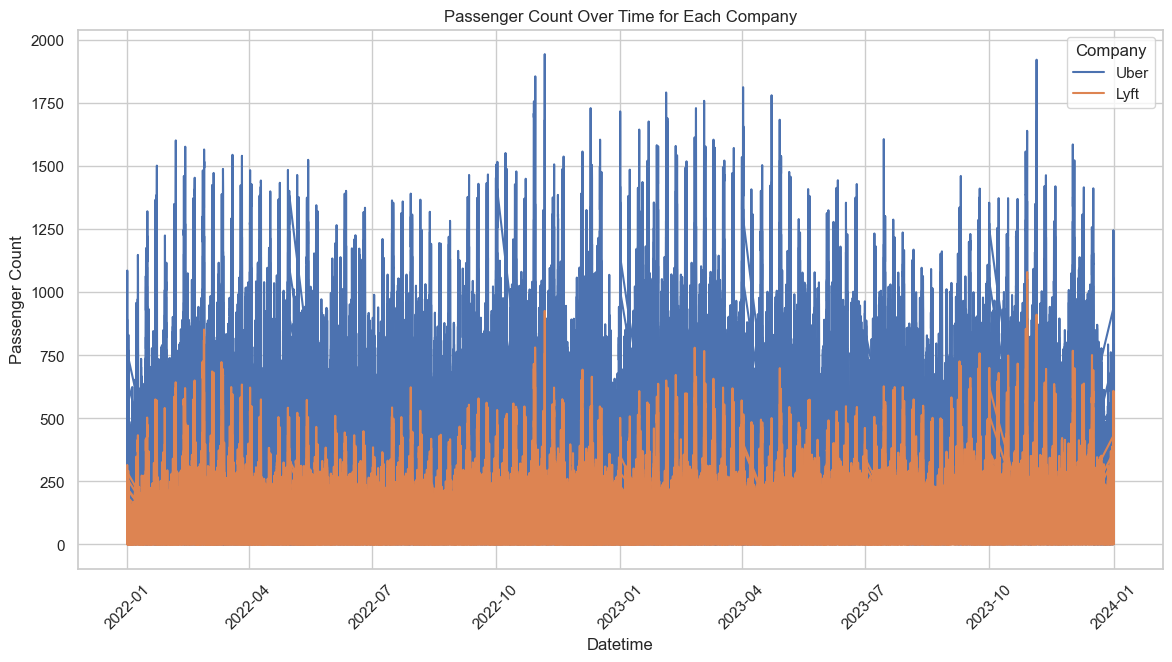

In [49]:
# 1. Passenger count over time for each company
plt.figure(figsize=(14, 7))
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    plt.plot(company_data['datetime'], company_data['passenger_count'], label=company)
plt.title('Passenger Count Over Time for Each Company')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

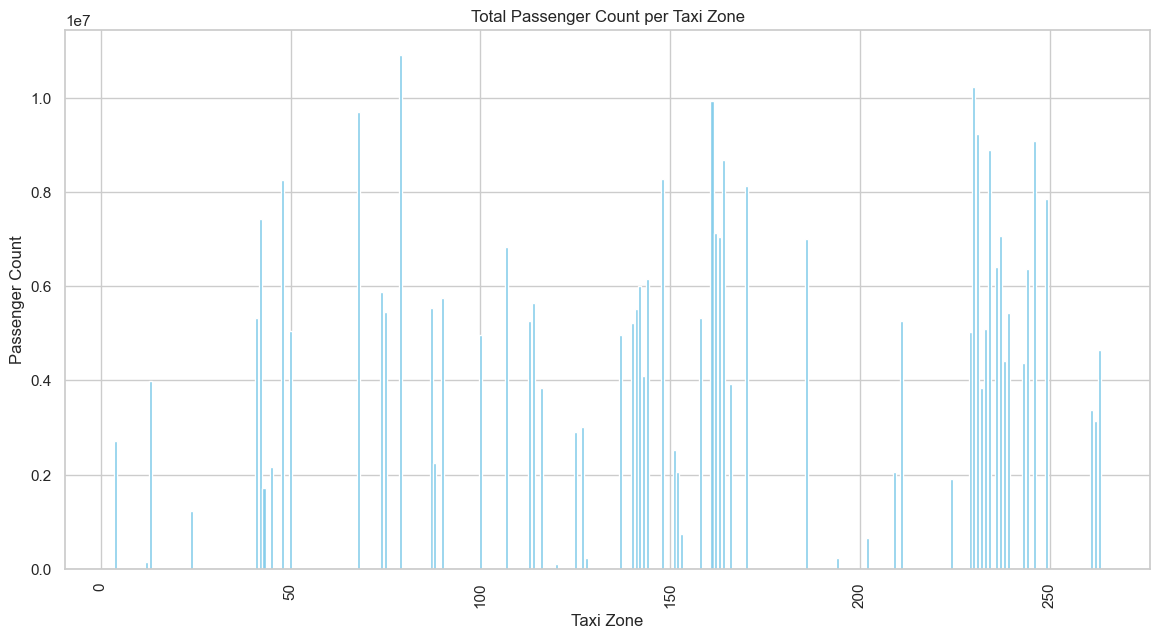

In [50]:
# 2. Total passenger count per taxi zone
plt.figure(figsize=(14, 7))
taxi_zone_counts = df.groupby('taxi_zone')['passenger_count'].sum().reset_index()
plt.bar(taxi_zone_counts['taxi_zone'], taxi_zone_counts['passenger_count'], color='skyblue')
plt.title('Total Passenger Count per Taxi Zone')
plt.xlabel('Taxi Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

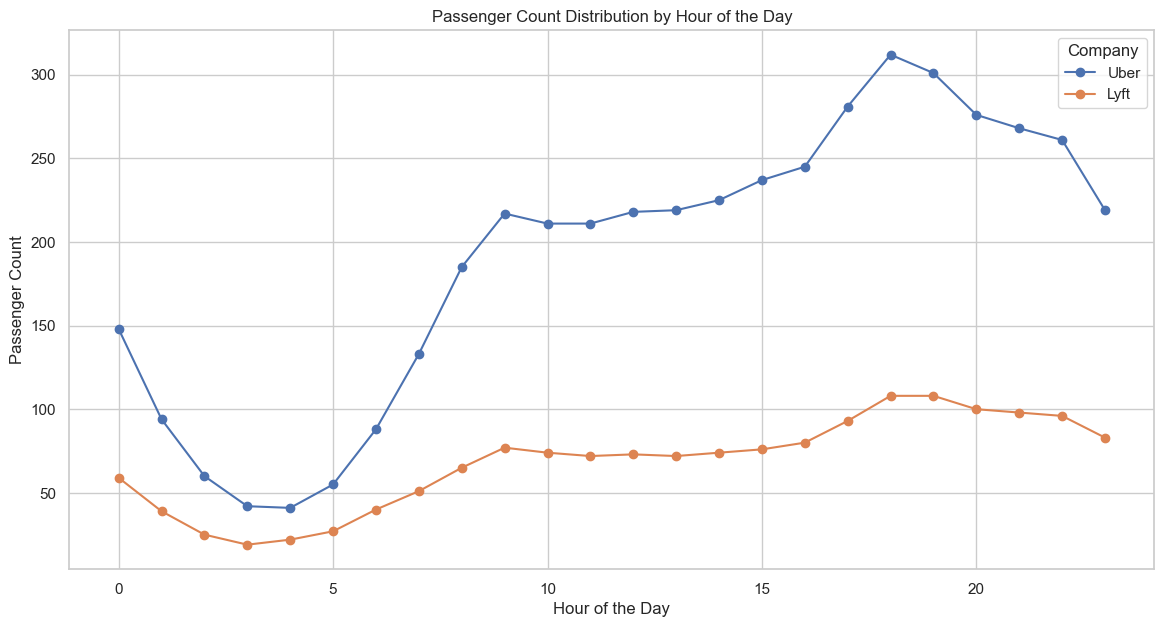

In [51]:
# 3. Passenger count distribution by hour of the day
plt.figure(figsize=(14, 7))
hours = df['hour'].unique()
hours.sort()
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    counts_by_hour = company_data.groupby('hour')['passenger_count'].median().reindex(hours)
    plt.plot(hours, counts_by_hour, marker='o', label=company)
plt.title('Passenger Count Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.legend(title='Company')
plt.grid(True)
plt.show()

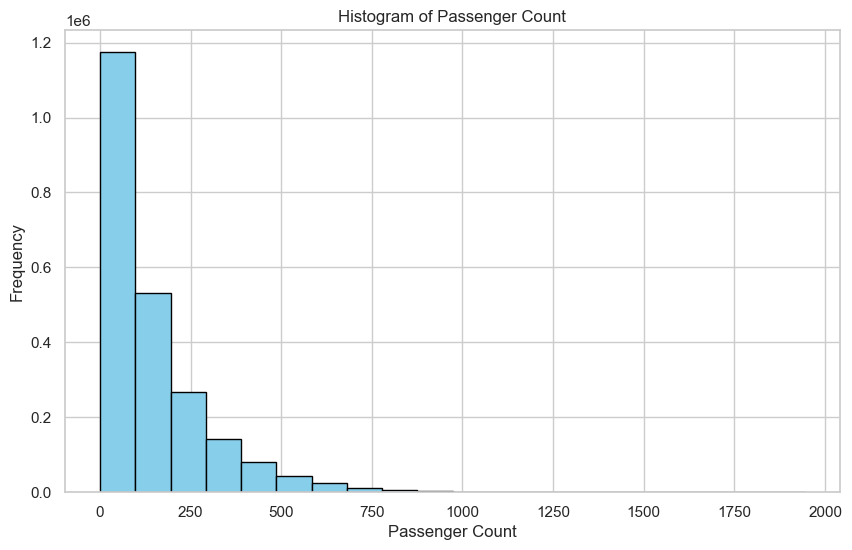

In [52]:
# 4. Histogram of Passenger Count
plt.figure(figsize=(10, 6))
plt.hist(df['passenger_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

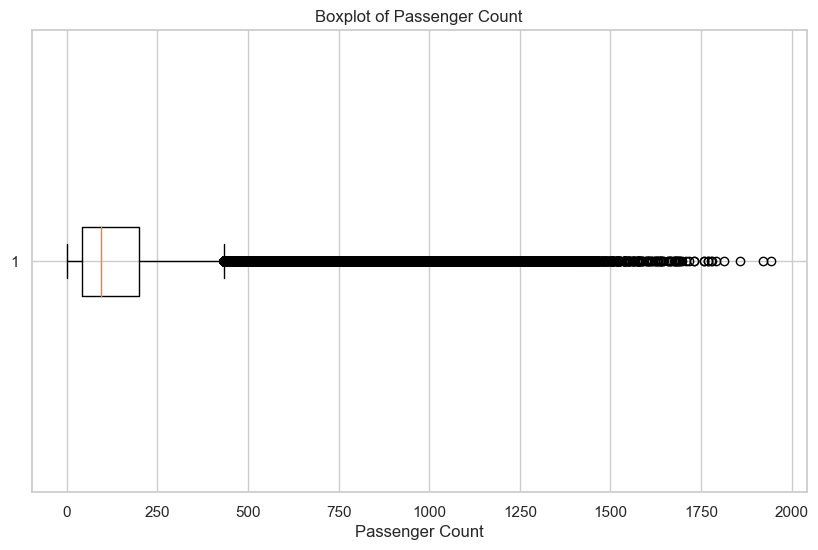

In [53]:
# 5. Boxplot of Passenger Count
plt.figure(figsize=(10, 6))
plt.boxplot(df['passenger_count'], vert=False)
plt.title('Boxplot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

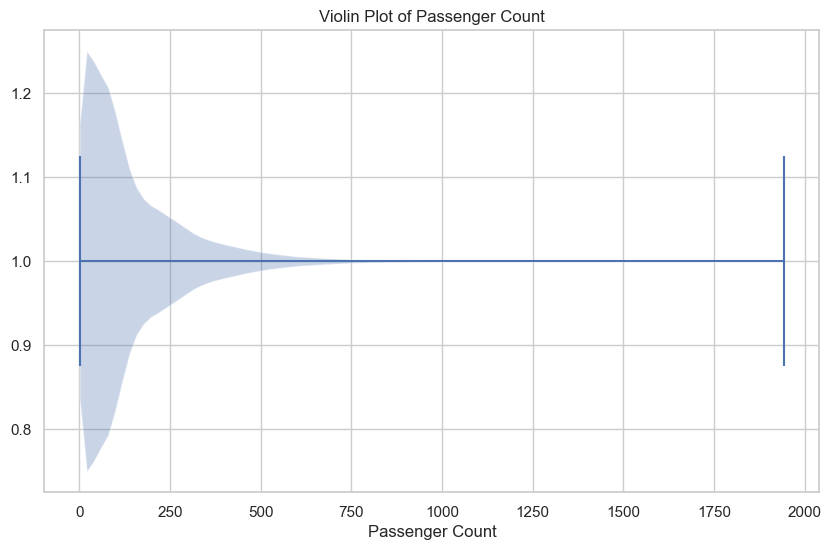

In [54]:
# 6. Violin Plot of Passenger Count
plt.figure(figsize=(10, 6))
plt.violinplot(df['passenger_count'], vert=False)
plt.title('Violin Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_25684\4156567918.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('week')['passenger_count'].sum().plot(kind='bar', color='skyblue')


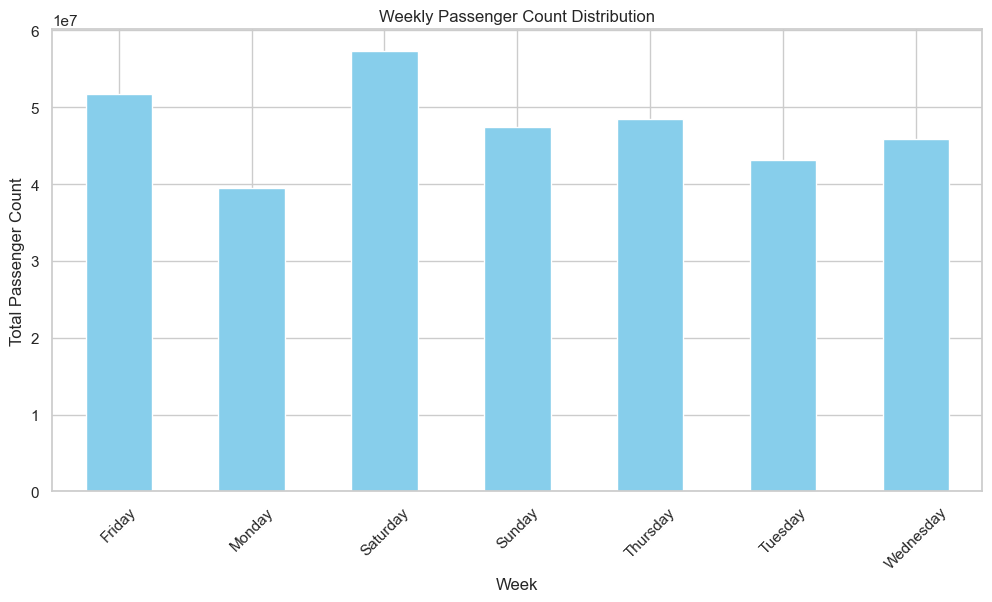

In [55]:
# 7. Weekly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('week')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Weekly Passenger Count Distribution')
plt.xlabel('Week')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

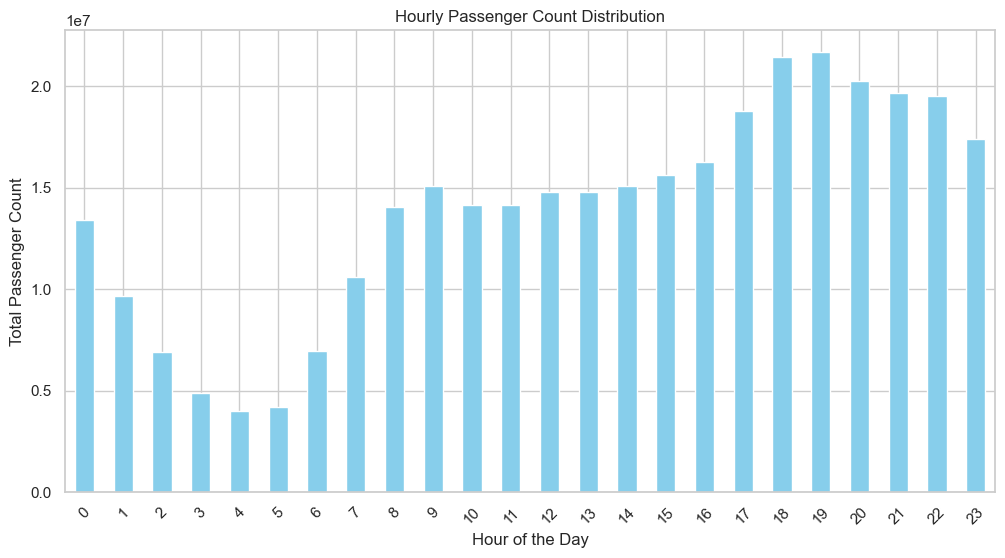

In [56]:
# 8. Hourly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('hour')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Hourly Passenger Count Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_25684\1379533227.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('company')['passenger_count'].sum().plot(kind='bar', color='skyblue')


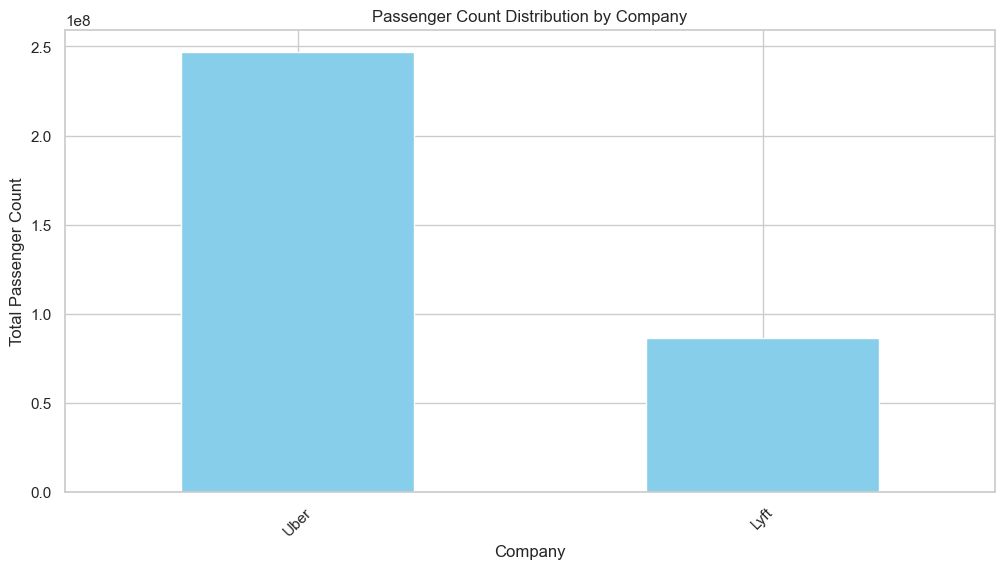

In [57]:
# 9. Passenger Count Distribution by Company
plt.figure(figsize=(12, 6))
df.groupby('company')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Passenger Count Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

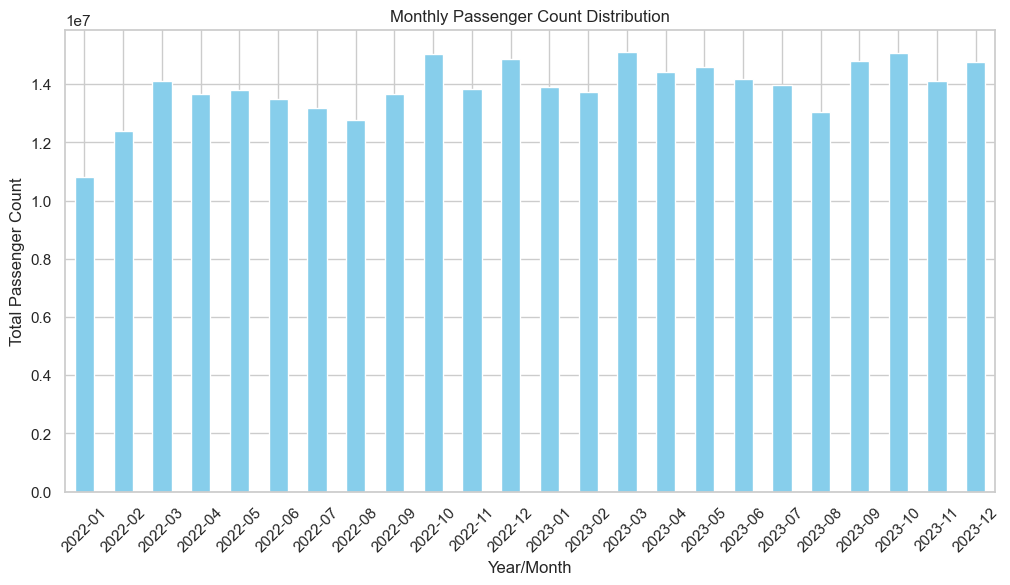

In [58]:
# 10. Monthly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('year_month')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Monthly Passenger Count Distribution')
plt.xlabel('Year/Month')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

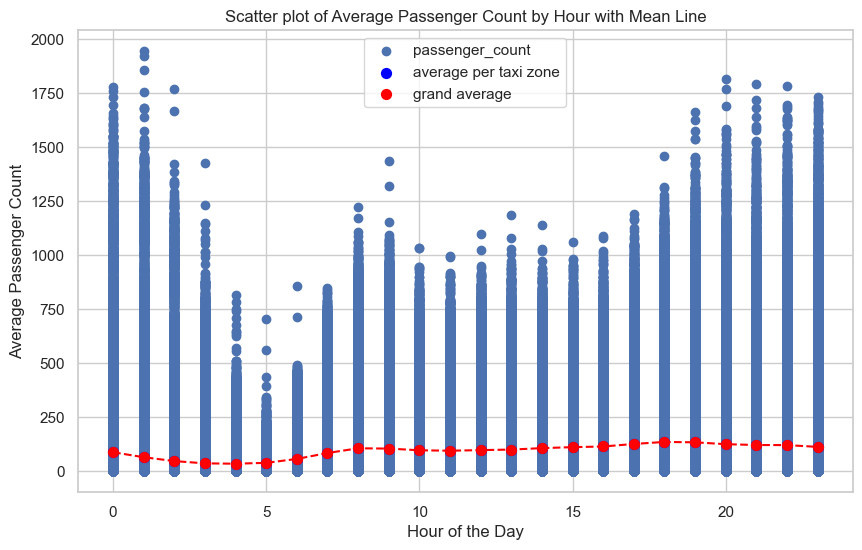

In [59]:
# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x='hour', y='passenger_count', data=df)

# Add circle marker to the different taxi zone values
#plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='blue', s=50, label='average per taxi zone')



# Add mean line
plt.plot(mean_passenger_count.index, mean_passenger_count.values, color='red', linestyle='dashed')

# Add circle marker to the mean values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='red', s=50, label='grand average')

# Set plot title and labels
plt.title('Scatter plot of Average Passenger Count by Hour with Mean Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')

# Display legend
plt.legend()

plt.show()

In [60]:
import matplotlib.pyplot as plt

# Set the value of agg.path.chunksize
plt.rcParams['agg.path.chunksize'] = 10000

# Now, proceed with generating your plots...


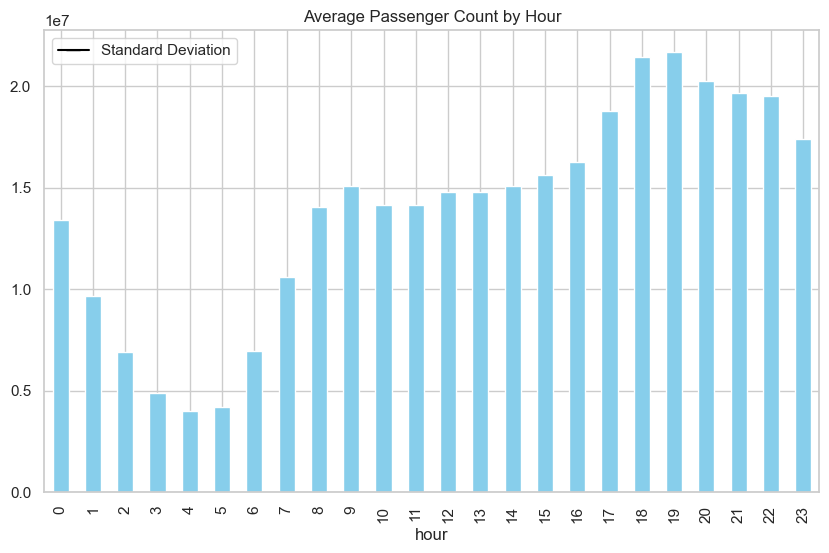

In [61]:
# Create the bar plot with error bars
plt.figure(figsize=(10,6))
df.groupby('hour')['passenger_count'].sum().plot(kind='bar', color='skyblue')

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

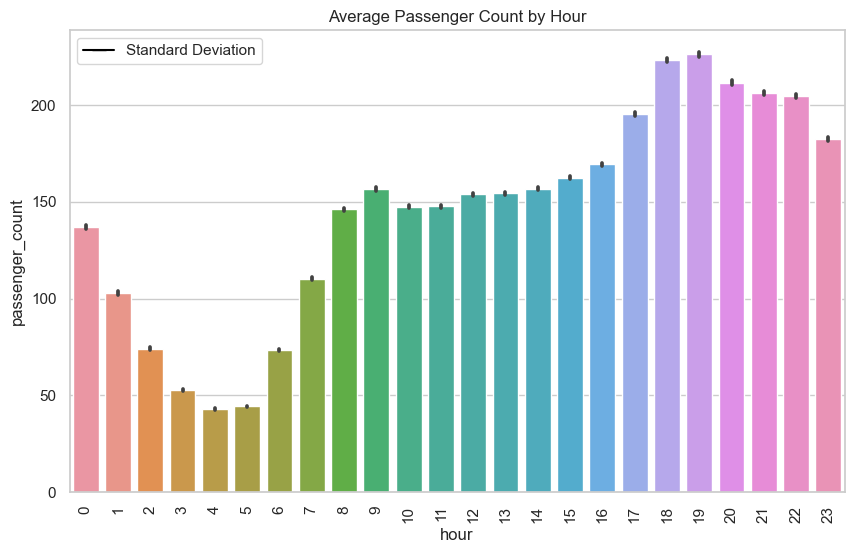

In [62]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=df)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

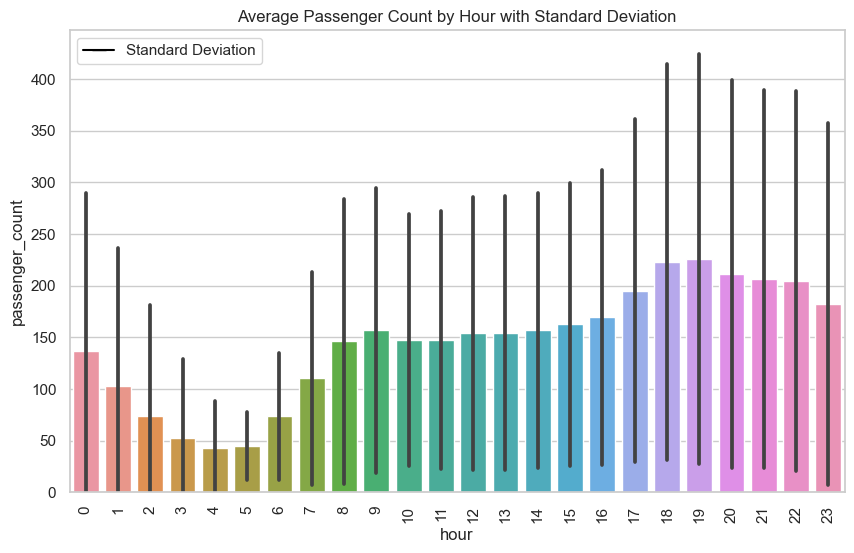

In [63]:
# Calculate the standard deviation for each hour
std_by_hour = df.groupby('hour')['passenger_count'].std()

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=df, ci='sd')

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour with Standard Deviation')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

In [64]:
std_by_hour

hour
0     152.174062
1     133.576043
2     106.757919
3      75.638066
4      45.704457
5      32.920823
6      61.415066
7     103.323038
8     138.253990
9     137.990115
10    122.190849
11    124.851449
12    131.992052
13    132.588492
14    133.190935
15    136.643605
16    142.506777
17    165.890971
18    191.767029
19    198.391788
20    188.062493
21    182.939562
22    183.837251
23    175.596164
Name: passenger_count, dtype: float64

Outliers need fixed, Possibly look into adjusting for the upward slope of the high volume. 